In [39]:
# sets up matplotlib with interactive features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



Main goals of analysis: 
Overall main goal: See which states are most expensive and cheap for individual groups, and if expensive or cheap cost
colleges are changing price more rapidly than total average price

STEPS TO ACCOMPLISH:
* Average fee per group
* Ranking states by cheapest to most expensive tuition (per group)
* Neighboring bar chart for top 5 and bottom 5 total tuition (for state school 4 year)
* Time series for all 5 groups
* Time series for all 5 groups, with additional lines of cheap and expensive

GROUPS
* 2 year instate tuition
* 2 year out of state tuition
* 4 year in state tuition
* 4 year out of state tuition
* private


In [40]:
tuition_data = pd.read_csv("tuition_data.csv")
fees_tuition = tuition_data[tuition_data["Expense"] == "Fees/Tuition"]
instate_2y = fees_tuition[(fees_tuition["Type"] == "Public In-State") & (fees_tuition["Length"] == "2-year")]
outstate_2y = fees_tuition[(fees_tuition["Type"] == "Public Out-of-State") & (fees_tuition["Length"] == "2-year")]
instate_4y = fees_tuition[(fees_tuition["Type"] == "Public In-State") & (fees_tuition["Length"] == "4-year")]
outstate_4y = fees_tuition[(fees_tuition["Type"] == "Public Out-of-State") & (fees_tuition["Length"] == "4-year")]
private = fees_tuition[(fees_tuition["Type"] == "Private")]



2 year instate standard deviation
1160.753920873162


/Users/ranjaniramanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


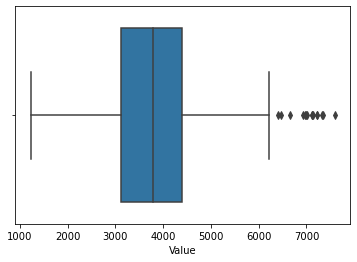

2 year out state standard deviation
2755.77212008688


/Users/ranjaniramanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

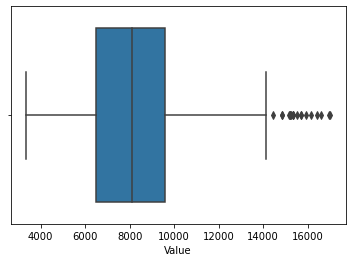

4 year instate standard deviation
2627.517475234919


/Users/ranjaniramanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

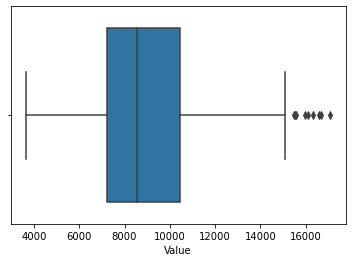

4 year outstate standard deviation
5868.710396745311


/Users/ranjaniramanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

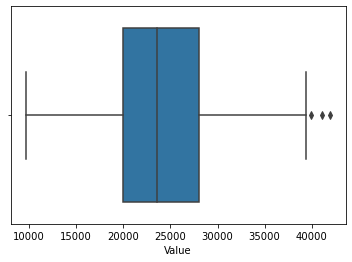

private standard deviation
9590.85848401214


/Users/ranjaniramanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

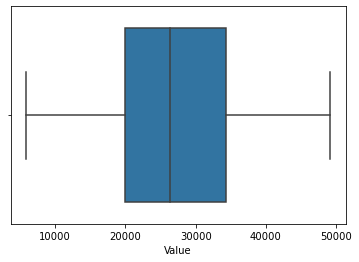

<Figure size 432x288 with 0 Axes>

In [41]:
#Check for outliers in tuition data 
print("2 year instate standard deviation")
print(instate_2y["Value"].std()) # Standard deviation of column

plt.figure()
sns.boxplot(instate_2y["Value"])
plt.show()
plt.clf()


print("2 year out state standard deviation")
print(outstate_2y["Value"].std()) # Standard deviation of column

plt.figure()
sns.boxplot(outstate_2y["Value"])
plt.show()
plt.clf()


print("4 year instate standard deviation")
print(instate_4y["Value"].std()) # Standard deviation of column

plt.figure()
sns.boxplot(instate_4y["Value"])
plt.show()
plt.clf()

print("4 year outstate standard deviation")
print(outstate_4y["Value"].std()) # Standard deviation of column

plt.figure()
sns.boxplot(outstate_4y["Value"])
plt.show()
plt.clf()

print("private standard deviation")
print(private["Value"].std()) # Standard deviation of column

plt.figure()
sns.boxplot(private["Value"])
plt.show()
plt.clf()


* The 2 year instate has the smallest standard deviation
* 2 year out of state and 4 year instate also have small standard deviations, in the 2000s range
* 4 year out state and private have high standard deviations
* Private college has a similar cost to 4 year outstate but a larger standard deviation

Recommendation: If a prospective student wants the college cost to be an expected cost, they should mainly apply to
2 year colleges and 4 year instate colleges

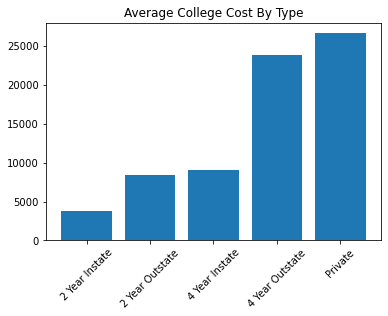

<Figure size 432x288 with 0 Axes>

In [42]:

instate_2y_avg = instate_2y["Value"].mean()
outstate_2y_avg =outstate_2y["Value"].mean()
instate_4y_avg = instate_4y["Value"].mean()
outstate_4y_avg =outstate_4y["Value"].mean()
private_avg = private["Value"].mean()
averages = [instate_2y_avg, outstate_2y_avg, instate_4y_avg, outstate_4y_avg, private_avg]
plt.bar(range(5),averages)

#create your ax object here
ax = plt.subplot()
ax.set_xticks(range(5))
ax.set_xticklabels(["2 Year Instate", "2 Year Outstate", "4 Year Instate", "4 Year Outstate", "Private"], rotation = 45)
plt.title("Average College Cost By Type")
plt.show()
plt.clf()

The bar graph shows that an out of state cost is 2 or more times higher than its respective in state for the same amount of years. Out of state 4 year is surprisingly close to private college cost

Recommendation: A student might benefit from applying to in state state schools rather than out of state, it would be twice the tuition for most likely the same quality of education. (Exception being that there is an exceptionally good school out of state outranking any college in the home state). 

In [43]:
#States ranked by tuition price
instate_2y_state = instate_2y.groupby("State").Value.mean().reset_index()
outstate_2y_state = outstate_2y.groupby("State").Value.mean().reset_index()
instate_4y_state = instate_4y.groupby("State").Value.mean().reset_index()
outstate_4y_state = outstate_4y.groupby("State").Value.mean().reset_index()
private_state = private.groupby("State").Value.mean().reset_index()

print("Least expensive instate 2 year colleges")
instate_2y_state = instate_2y_state.sort_values(by=['Value'])
print(instate_2y_state.head())

print("Most expensive instate 2 year colleges")
instate_2y_state = instate_2y_state.sort_values(by=['Value'], ascending=False)
print(instate_2y_state.head())
print("\n")

print("Least expensive outstate 2 year colleges")
outstate_2y_state = outstate_2y_state.sort_values(by=['Value'])
print(outstate_2y_state.head())

print("Most expensive outstate 2 year colleges")
outstate_2y_state = outstate_2y_state.sort_values(by=['Value'], ascending=False)
print(outstate_2y_state.head())
print("\n")


print("Least expensive instate 4 year colleges")
instate_4y_state = instate_4y_state.sort_values(by=['Value'])
print(instate_4y_state.head())

print("Most expensive instate 4 year colleges")
instate_4y_state = instate_4y_state.sort_values(by=['Value'], ascending=False)
print(instate_4y_state.head())
print("\n")


print("Least expensive outstate 4 year colleges")
outstate_4y_state = outstate_4y_state.sort_values(by=['Value'])
print(outstate_4y_state.head())

print("Most expensive outstate 4 year colleges")
outstate_4y_state = outstate_4y_state.sort_values(by=['Value'], ascending=False)
print(outstate_4y_state.head())
print("\n")


print("Least expensive private colleges")
private_state = private_state.sort_values(by=['Value'])
print(private_state.head())

print("Most expensive private colleges")
private_state = private_state.sort_values(by=['Value'], ascending=False)
print(private_state.head())

Least expensive instate 2 year colleges
             State        Value
4       California  1256.000000
30      New Mexico  1591.222222
2          Arizona  2070.000000
42           Texas  2161.444444
32  North Carolina  2411.444444
Most expensive instate 2 year colleges
            State        Value
28  New Hampshire  7179.666667
44        Vermont  6265.555556
40   South Dakota  5788.111111
22      Minnesota  5399.888889
31       New York  5032.000000


Least expensive outstate 2 year colleges
          State        Value
1        Alaska  3843.800000
26     Nebraska  3848.000000
15       Kansas  4433.777778
3      Arkansas  4722.666667
23  Mississippi  5155.888889
Most expensive outstate 2 year colleges
            State         Value
41      Tennessee  15576.777778
28  New Hampshire  15554.444444
16       Kentucky  13391.333333
37   Pennsylvania  12541.888889
44        Vermont  12413.333333


Least expensive instate 4 year colleges
                   State     Value
50               

This is for informational purposes, states for different types of colleges vary. Northwest region seems inexpensive for 4 year colleges, North and Central East coast states have more expensive 4 year colleges. 

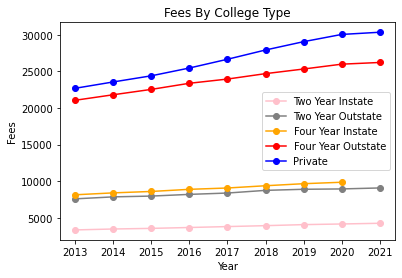

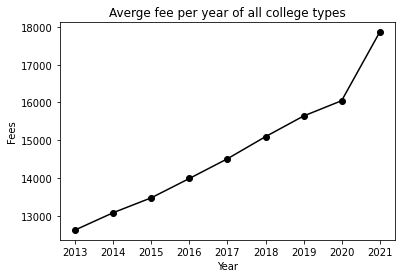

<Figure size 432x288 with 0 Axes>

In [44]:
#Line graphs of college type average tuition change by year

x = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
x2 = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] #4 year instate misses values for 2021 in the csv

instate_2y_year = instate_2y.groupby("Year").Value.mean().reset_index()
outstate_2y_year = outstate_2y.groupby("Year").Value.mean().reset_index()
instate_4y_year = instate_4y.groupby("Year").Value.mean().reset_index()
outstate_4y_year = outstate_4y.groupby("Year").Value.mean().reset_index()
private_year = private.groupby("Year").Value.mean().reset_index()
fees_tuition_yearly = fees_tuition.groupby("Year").Value.mean().reset_index() #Total average cost of colleges by year

y1 = list(instate_2y_year["Value"])
y2 = list(outstate_2y_year["Value"])
y3 = list(instate_4y_year["Value"])
y4 = list(outstate_4y_year["Value"])
y5 = list(private_year["Value"])
y6 = list(fees_tuition_yearly["Value"])


plt.plot(x, y1, color='pink', marker = 'o')
plt.plot(x, y2, color='gray', marker='o')
plt.plot(x2, y3, color='orange', marker = 'o')
plt.plot(x, y4, color='red', marker='o')
plt.plot(x, y5, color='blue', marker = 'o')

plt.xlabel('Year')
plt.ylabel('Fees')
plt.title('Fees By College Type')
plt.legend( ["Two Year Instate", "Two Year Outstate", "Four Year Instate", "Four Year Outstate", "Private"], loc=5)
plt.show()
plt.clf()

plt.plot(x, y6, color='black', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Fees')
plt.title('Averge fee per year of all college types')
plt.show()
plt.clf()

* The difference between 4 year outstate and private tuition start to diverge after 2018
* There is a significant jump from 4 year instate to 4 year outstate
* The college prices increase for all types of colleges
* Linear change in the total average


Recommendation: A student should be concious that the college price for their graduation year will be more expensive than recorded prices of previous years, for any college type. A public school has a lower rate of increase than private school. 


* For the Average fee per year, please ignore 2021 as it excludes instate 4y data which was not present in the 2021 csv